In [84]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [85]:
from keras.preprocessing.image import ImageDataGenerator

In [86]:
import cv2
import imghdr
import tensorflow as tf
import os

In [87]:
data_dir = '/content/drive/MyDrive/NewDataSet/Capstone_project'

In [88]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [89]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image /content/drive/MyDrive/NewDataSet/Capstone_project/tets/illegal
Issue with image /content/drive/MyDrive/NewDataSet/Capstone_project/tets/legal
Issue with image /content/drive/MyDrive/NewDataSet/Capstone_project/train/legal_dump
Issue with image /content/drive/MyDrive/NewDataSet/Capstone_project/train/illegal_dump


In [90]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/NewDataSet/Capstone_project/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/NewDataSet/Capstone_project/tets',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 589 files belonging to 2 classes.
Found 358 files belonging to 2 classes.


In [91]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [92]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_11 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_12 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_12 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [94]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [95]:
history = model.fit(train_ds,epochs=5,validation_data=validation_ds)

Epoch 1/5
19/19 [==============================] - 10s 230ms/step - loss: 5.2684 - accuracy: 0.8710 - val_loss: 2.6084 - val_accuracy: 0.7570
Epoch 2/5
19/19 [==============================] - 9s 428ms/step - loss: 0.7818 - accuracy: 0.9847 - val_loss: 13.0856 - val_accuracy: 0.5894
Epoch 3/5
19/19 [==============================] - 6s 260ms/step - loss: 0.1708 - accuracy: 0.9932 - val_loss: 32.1695 - val_accuracy: 0.4972
Epoch 4/5
19/19 [==============================] - 8s 282ms/step - loss: 0.2791 - accuracy: 0.9915 - val_loss: 20.9391 - val_accuracy: 0.6145
Epoch 5/5
19/19 [==============================] - 6s 261ms/step - loss: 0.7594 - accuracy: 0.9864 - val_loss: 20.0282 - val_accuracy: 0.6145


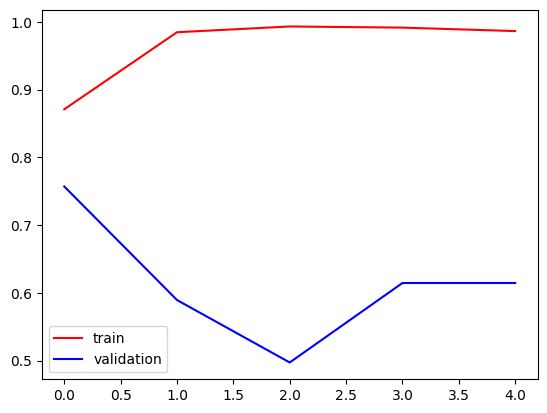

In [98]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

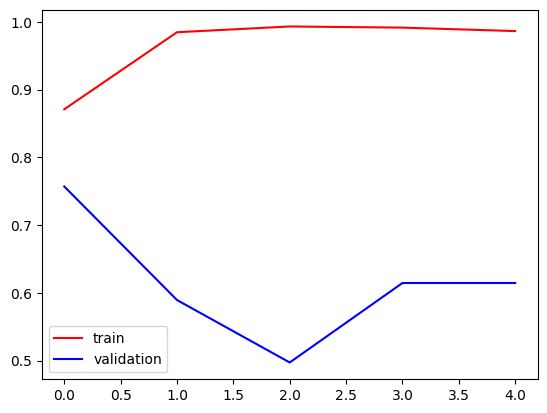

In [99]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [100]:
import cv2

In [101]:
test_img = cv2.imread('/content/14.jpg')

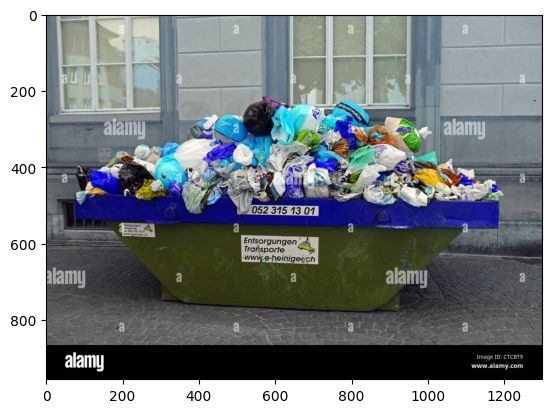

In [102]:
plt.imshow(test_img)

In [103]:
test_img = cv2.resize(test_img,(256,256))

In [104]:
test_input = test_img.reshape((1,256,256,3))

In [105]:
model.predict(test_input)

1/1 [==============================] - 0s 135ms/step


array([[1.]], dtype=float32)

In [ ]:
#Class 1 --> illegal
#CLASS 0 --> Legal